In [1]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA


In [6]:
total_df = pd.read_csv("data/merged.csv")
growth_df = total_df["FRT_LNGTH,FWRCT_HGHT,BLMNG_CLUSTER,FRST_TREE_CNT,FRT_WT,FRT_WDTH,GRTH_LNGTH,YIELD_CLUSTER,LAST_FWRCT_NO,LEAF_LNGTH,LEAF_CNT,LEAF_WDTH,PLT_LNGTH,STEM_THNS".split(",")]
control_df = total_df["PFBS_NTRO_CBDX_CTRN,EXTN_TPRT,DWP_TPRT,WNDRC,ABSLT_HMDT,WDSP,STRTN_WATER,EXTN_SRQT,WATER_LACK_VL,EXTN_ACCMLT_QOFLG,SPL_TPRT_1,SPL_TPRT_2,HTNG_TPRT_1,VNTILAT_TPRT_5,VNTILAT_TPRT_4,VNTILAT_TPRT_3,VNTILAT_TPRT_2,VNTILAT_TPRT_1,TRWVLV_OPDR_RATE_2,TRWVLV_OPDR_RATE_1,HRZNT_SCRN_OPDR_RATE_2,SKLT_OPDR_RATE_1_LEFT,HRZNT_SCRN_OPDR_RATE_1,SKLT_OPDR_RATE_1_RIGHT,INNER_TPRT_1,INNER_TPRT_2,AVE_INNER_TPRT_1_2,AVE_INNER_HMDT_1_2,INNER_HMDT_1,INNER_HMDT_2,CBDX_STNG_VL,WTSPL_QTY,NTSLT_SPL_PH_LVL,NTSLT_SPL_PH_LVL_STNG_VL,NTSLT_SPL_ELCDT,NTSLT_SPL_ELCDT_STNG_VL,DYTM_NIGHT_CD,SPRYN_DEVICE,SUB_MHRLS_OPRT_YN_1,SUB_MHRLS_OPRT_YN_2,SUB_MHRLS_OPRT_YN_3,SUB_MHRLS_OPMD_2,PRCPT_YN,FMGEQ_OPMD,CBDX_GNRT_OPMD,TRWVLV_OPMD_1,SKLT_OPMD_1_LEFT,FMGEQ_OPRT_YN,CBDX_GNRT_OPRT_YN".split(",")]

In [30]:
from datetime import datetime, timedelta
for t in range(1, total_df["MSRM_DT"].shape[0]):
    before = datetime.strptime( total_df["MSRM_DT"].iloc[t-1], "%Y-%m-%d %H:%M:%S")+timedelta(minutes=5)
    after = datetime.strptime( total_df["MSRM_DT"].iloc[t], "%Y-%m-%d %H:%M:%S")
    if before != after:
        print(t, before, after)

In [45]:
growth_df.describe().T

count         mean          std      min        25%  \
FRT_LNGTH      48384.0    61.831964     4.012343    54.64    59.5200   
FWRCT_HGHT     48384.0   206.406786    39.939255   122.97   171.3000   
BLMNG_CLUSTER  48384.0    17.103631     4.827118     6.88    13.2525   
FRST_TREE_CNT  48384.0    18.342262     3.241125    13.12    15.3800   
FRT_WT         48384.0   230.583929    40.430381   169.22   205.7200   
FRT_WDTH       48384.0    78.182262     4.038882    68.17    75.5700   
GRTH_LNGTH     48384.0   208.862381    29.857743   166.18   185.1800   
YIELD_CLUSTER  48384.0    10.046905     4.557061     2.13     6.3425   
LAST_FWRCT_NO  48384.0    17.250060     4.469702     7.32    13.6475   
LEAF_LNGTH     48384.0   364.467202    41.124799   270.55   336.1100   
LEAF_CNT       48384.0    15.478452     1.476834    12.32    14.6200   
LEAF_WDTH      48384.0   281.521250    49.898570   174.84   246.9200   
PLT_LNGTH      48384.0  5647.719405  1414.110630  3025.64  4516.4850   
STEM_THNS      48384.0     8.727798     1.672148     5.08     7.2800   

                    50%        75%      max  
FRT_LNGTH        61.545    63.6400    75.95  
FWRCT_HGHT      205.930   233.3200   285.05  
BLMNG_CLUSTER    17.280    21.3300    24.14  
FRST_TREE_CNT    18.420    21.0500    24.07  
FRT_WT          227.550   239.9300   397.01  
FRT_WDTH         78.170    80.9400    86.17  
GRTH_LNGTH      209.085   216.7600   303.75  
YIELD_CLUSTER     9.750    13.8500    18.10  
LAST_FWRCT_NO    17.860    21.1750    24.38  
LEAF_LNGTH      350.840   401.7500   434.34  
LEAF_CNT         15.820    16.5300    17.73  
LEAF_WDTH       281.240   324.0600   366.76  
PLT_LNGTH      5779.460  6995.6725  7555.68  
STEM_THNS         8.980    10.2500    11.43

In [46]:
for col in growth_df.columns:
    unique_count = growth_df[col].nunique()
    print(f"Column '{col}'의 고유값 수: {unique_count}")

Column 'FRT_LNGTH'의 고유값 수: 47
Column 'FWRCT_HGHT'의 고유값 수: 44
Column 'BLMNG_CLUSTER'의 고유값 수: 47
Column 'FRST_TREE_CNT'의 고유값 수: 41
Column 'FRT_WT'의 고유값 수: 48
Column 'FRT_WDTH'의 고유값 수: 48
Column 'GRTH_LNGTH'의 고유값 수: 43
Column 'YIELD_CLUSTER'의 고유값 수: 48
Column 'LAST_FWRCT_NO'의 고유값 수: 39
Column 'LEAF_LNGTH'의 고유값 수: 42
Column 'LEAF_CNT'의 고유값 수: 42
Column 'LEAF_WDTH'의 고유값 수: 45
Column 'PLT_LNGTH'의 고유값 수: 46
Column 'STEM_THNS'의 고유값 수: 44


In [44]:
control_df.describe().T

count         mean         std     min     25%  \
PFBS_NTRO_CBDX_CTRN       48384.0   417.551146   84.547832  179.67  351.67   
EXTN_TPRT                 48384.0     9.895658    8.578428  -12.30    2.93   
DWP_TPRT                  48384.0    15.302369    3.269531    3.67   12.77   
WNDRC                     48384.0   186.665003  103.291872    0.00  132.00   
ABSLT_HMDT                48384.0    13.377881    3.039645    6.30   11.10   
WDSP                      48384.0     1.010192    1.118273    0.00    0.15   
STRTN_WATER               48384.0    17.021687    5.543181   10.43   12.73   
EXTN_SRQT                 48384.0   152.861035  236.089185    0.00    0.00   
WATER_LACK_VL             48384.0     3.644528    3.410019    0.17    1.37   
EXTN_ACCMLT_QOFLG         48384.0  1222.244286  576.027302   72.00  837.33   
SPL_TPRT_1                48384.0    29.587158    6.564527   15.37   23.97   
SPL_TPRT_2                48384.0    29.521522    4.679110   17.50   26.00   
HTNG_TPRT_1               48384.0    15.314930    1.709230   12.00   13.80   
VNTILAT_TPRT_5            48384.0     4.601886    5.801414    0.00    0.00   
VNTILAT_TPRT_4            48384.0     3.408970    4.309985    0.00    0.00   
VNTILAT_TPRT_3            48384.0    14.777279    6.020564    8.50    9.50   
VNTILAT_TPRT_2            48384.0    13.661783    4.587204    7.50   10.00   
VNTILAT_TPRT_1            48384.0    17.759020    3.140662   12.83   14.83   
TRWVLV_OPDR_RATE_2        48384.0    15.538442   26.323751    0.00    0.50   
TRWVLV_OPDR_RATE_1        48384.0    30.104477   29.468615    0.00    0.00   
HRZNT_SCRN_OPDR_RATE_2    48384.0    68.083354   41.486914    0.00   30.00   
SKLT_OPDR_RATE_1_LEFT     48384.0    26.710762   35.334628    0.00    0.00   
HRZNT_SCRN_OPDR_RATE_1    48384.0    79.360956   35.320624    0.00   50.00   
SKLT_OPDR_RATE_1_RIGHT    48384.0    25.753555   34.594386    0.00    0.00   
INNER_TPRT_1              48384.0    18.848890    4.684028   12.00   14.87   
INNER_TPRT_2              48384.0    18.808285    4.507459   11.80   14.93   
AVE_INNER_TPRT_1_2        48384.0    18.828574    4.591233   11.92   14.90   
AVE_INNER_HMDT_1_2        48384.0    82.327621   11.016920   38.15   74.90   
INNER_HMDT_1              48384.0    81.585038   11.649284   33.27   73.83   
INNER_HMDT_2              48384.0    83.070274   10.720402   35.70   76.57   
CBDX_STNG_VL              48384.0   498.952249   86.189525  100.00  438.00   
WTSPL_QTY                 48384.0    74.306548   44.309892    0.00   60.00   
NTSLT_SPL_PH_LVL          48384.0     5.682701    0.408291    4.10    5.40   
NTSLT_SPL_PH_LVL_STNG_VL  48384.0     5.229799    0.214707    5.00    5.10   
NTSLT_SPL_ELCDT           48384.0     2.911471    0.407533    0.20    2.70   
NTSLT_SPL_ELCDT_STNG_VL   48384.0     2.809970    0.207640    2.30    2.70   
DYTM_NIGHT_CD             48384.0     0.484912    0.499777    0.00    0.00   
SPRYN_DEVICE              48384.0     0.025132    0.156528    0.00    0.00   
SUB_MHRLS_OPRT_YN_1       48384.0     0.699487    0.458486    0.00    0.00   
SUB_MHRLS_OPRT_YN_2       48384.0     0.506324    0.499965    0.00    0.00   
SUB_MHRLS_OPRT_YN_3       48384.0     0.499318    0.500005    0.00    0.00   
SUB_MHRLS_OPMD_2          48384.0     0.347718    0.476251    0.00    0.00   
PRCPT_YN                  48384.0     0.064587    0.245799    0.00    0.00   
FMGEQ_OPMD                48384.0     0.621652    0.484980    0.00    0.00   
CBDX_GNRT_OPMD            48384.0     0.923838    0.265259    0.00    1.00   
TRWVLV_OPMD_1             48384.0     0.321015    0.466871    0.00    0.00   
SKLT_OPMD_1_LEFT          48384.0     0.993407    0.080931    0.00    1.00   
FMGEQ_OPRT_YN             48384.0     0.122313    0.327651    0.00    0.00   
CBDX_GNRT_OPRT_YN         48384.0     0.257440    0.437229    0.00    0.00   

                              50%        75%      max  
PFBS_NTRO_CBDX_CTRN        402.00   474.0825   999.00  
EXTN_TPRT      

In [42]:
growth_df.head()

FRT_LNGTH  FWRCT_HGHT  BLMNG_CLUSTER  FRST_TREE_CNT  FRT_WT  FRT_WDTH  \
0      65.98      220.91           6.88          16.24   236.5     82.84   
1      65.98      220.91           6.88          16.24   236.5     82.84   
2      65.98      220.91           6.88          16.24   236.5     82.84   
3      65.98      220.91           6.88          16.24   236.5     82.84   
4      65.98      220.91           6.88          16.24   236.5     82.84   

   GRTH_LNGTH  YIELD_CLUSTER  LAST_FWRCT_NO  LEAF_LNGTH  LEAF_CNT  LEAF_WDTH  \
0       201.3           2.13           7.32       428.6     16.14     357.62   
1       201.3           2.13           7.32       428.6     16.14     357.62   
2       201.3           2.13           7.32       428.6     16.14     357.62   
3       201.3           2.13           7.32       428.6     16.14     357.62   
4       201.3           2.13           7.32       428.6     16.14     357.62   

   PLT_LNGTH  STEM_THNS  
0    3025.64       8.41  
1    3025.64       8.41  
2    3025.64       8.41  
3    3025.64       8.41  
4    3025.64       8.41

In [43]:
control_df.head()

PFBS_NTRO_CBDX_CTRN  EXTN_TPRT  DWP_TPRT  WNDRC  ABSLT_HMDT  WDSP  \
0                521.0      -1.35     13.35  276.0       11.45   0.0   
1                522.0      -1.30     13.25  332.0       11.45   0.7   
2                522.0      -1.50     13.40  344.0       11.50   0.0   
3                525.5      -1.55     13.40  344.0       11.50   0.0   
4                524.0      -1.40     13.40  344.0       11.50   0.0   

   STRTN_WATER  EXTN_SRQT  WATER_LACK_VL  EXTN_ACCMLT_QOFLG  ...  \
0        13.40        0.0           1.95              952.0  ...   
1        13.25        0.0           1.80              952.0  ...   
2        13.25        0.0           1.75              952.0  ...   
3        13.30        0.0           1.80              952.0  ...   
4        13.30        0.0           1.80              952.0  ...   

   SUB_MHRLS_OPRT_YN_2  SUB_MHRLS_OPRT_YN_3  SUB_MHRLS_OPMD_2  PRCPT_YN  \
0                  0.0                  0.0               1.0       0.0   
1                  0.0                  0.0               1.0       0.0   
2                  0.0                  0.0               1.0       0.0   
3                  0.0                  0.0               1.0       0.0   
4                  0.0                  0.0               1.0       0.0   

   FMGEQ_OPMD  CBDX_GNRT_OPMD  TRWVLV_OPMD_1  SKLT_OPMD_1_LEFT  FMGEQ_OPRT_YN  \
0         1.0             1.0            0.0               1.0            1.0   
1         1.0             1.0            0.0               1.0            1.0   
2         1.0             1.0            0.0               1.0            1.0   
3         1.0             1.0            0.0               1.0            1.0   
4         1.0             1.0            0.0               1.0            1.0   

   CBDX_GNRT_OPRT_YN  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 49 columns]

In [19]:
fig = px.imshow(growth_df.corr(), text_auto=True, width=1000, height=1000, title="Growth Data")
fig.show()

In [39]:
fig = px.imshow(control_df.corr(), text_auto=True, width=1000, height=1000, title="Control Data")
fig.show()

In [50]:
fig = px.density_heatmap(control_df, x="INNER_TPRT_1", y="EXTN_TPRT",
                         marginal_x="histogram", marginal_y="histogram",
                         facet_row="SUB_MHRLS_OPRT_YN_2", facet_col="DYTM_NIGHT_CD",
                         text_auto=True,
                        width=800, height=700)
fig.show()

In [56]:
fig = px.histogram(
    control_df, x="INNER_TPRT_1", y="EXTN_TPRT",
    color="DYTM_NIGHT_CD", marginal="box", # or violin, rug
    width=800
)
fig.show()

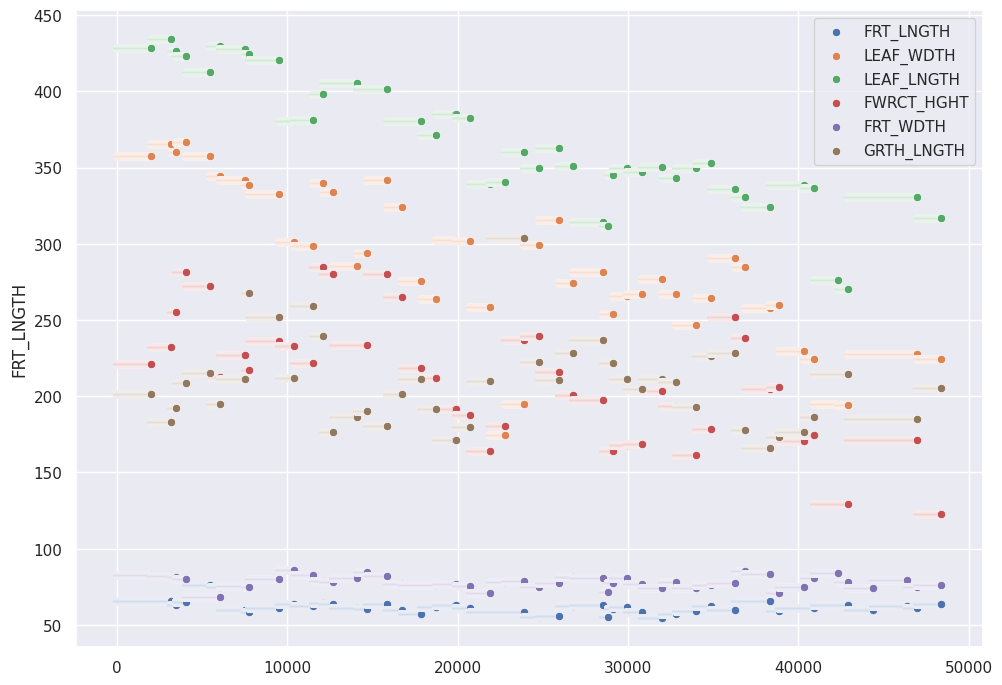

In [43]:
growth= {
    "large": { # 1000 ~
        "PLT_LNGTH": "식물길이", # 혼자 하늘을 날고 있어서 제외: 3000->7000
    },
    "middle": { # 50 ~ 500
        "FRT_LNGTH": "과일길이",
        "LEAF_WDTH": "엽폭",
        "LEAF_LNGTH": "엽장",
        
        "FWRCT_HGHT": "화방높이",
        "FRT_WDTH": "과일폭",
        "GRTH_LNGTH": "생장길이"
    },
    "small": { # 0 ~ 25
        "STEM_THNS": "줄기굵기",
        "LAST_FWRCT_NO": "최종화방번호",
        "LEAF_CNT": "엽수",
        "BLMNG_CLUSTER": "개화군",
        "YIELD_CLUSTER": "수확군",
        "FRST_TREE_CNT": "착과수",
    }
}

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
for k in growth["middle"].keys():
    sns.scatterplot(data=total_df[k], label=k)

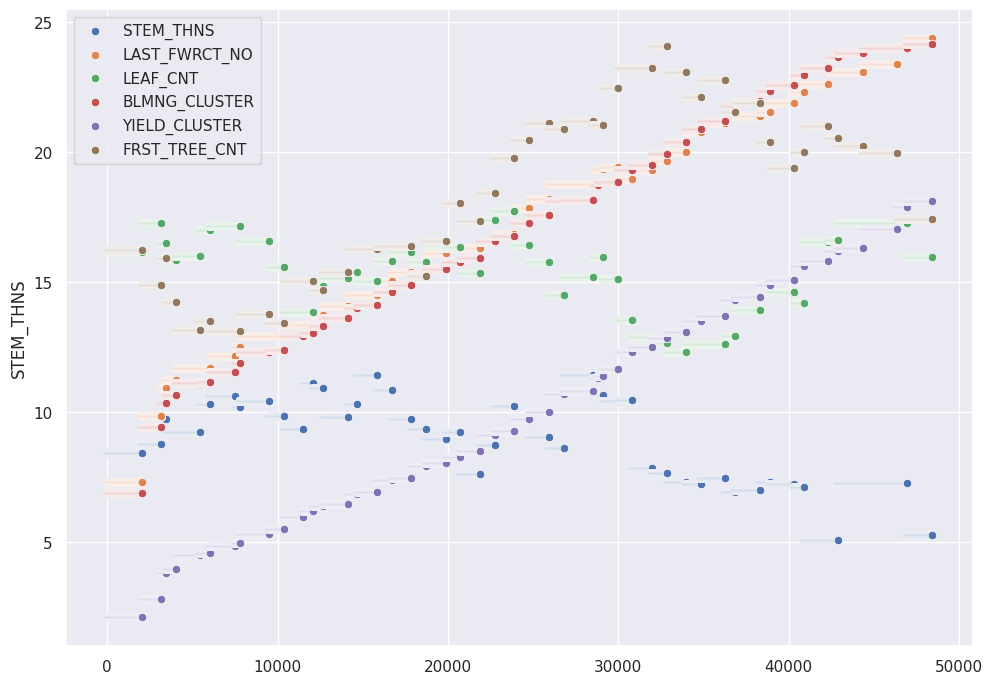

In [44]:

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
for k in growth["small"].keys():
    sns.scatterplot(data=total_df[k], label=k)

In [ ]:


fig = px.histogram(
    growth_df, x="STEM_THNS", y="LAST_FWRCT_NO",
    color="LAST_FWRCT_NO", marginal="box", # or violin, rug
    width=800
)
fig.show()